##### 影像的侵蝕與膨脹
這篇教學會介紹兩種 OpenCV 的影像形態學處理：侵蝕 ( Erosion ) 和膨脹 ( Dilation )，透過這兩種處理方式，能夠實現去除雜訊或是連接破碎景物的功能。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 什麼是侵蝕 ( Erosion )？ 
當空間中有兩個集合 ( A 集合和 B 集合 )，當 A 集合的部分空間被 B 集合所取代，則稱之為「侵蝕 ( Erosion )」，\
通常進行侵蝕後的影像，黑色區域會擴張，白色區域會縮小。

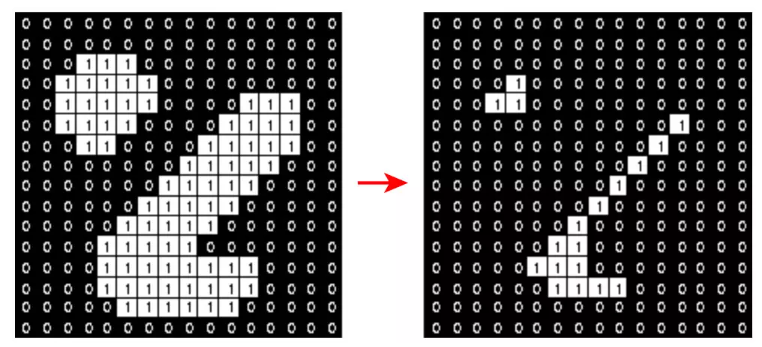

##### 什麼是膨脹 ( Dilation )？ 
當空間中有兩個集合 ( A 集合和 B 集合 )，當 A 集合的部分空間擴張到 B 集合，則稱之為「膨脹 ( Dilation )」，通常進行膨脹後的影像，白色區域會擴張，黑色區域會縮小。

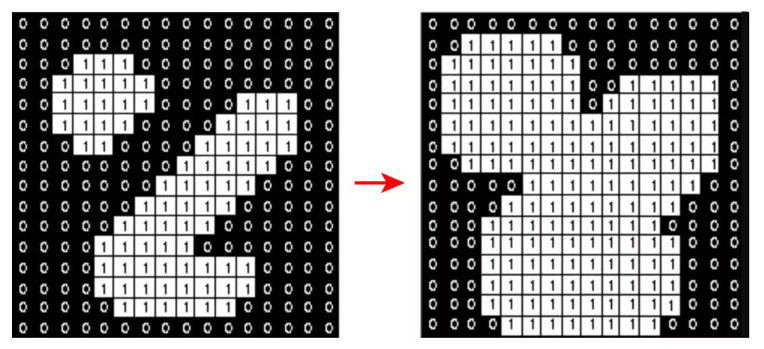

##### 如何使用侵蝕與膨脹？ 
在進行影像的侵蝕或膨脹之前，需要使用 cv2.getStructuringElement 方法，執行後會返回指定大小和形狀的結構元素，\
接著就會參考這些結構元素進行侵蝕或膨脹，使用方法如下：

In [ ]:
kernel = cv2.getStructuringElement(shape, ksize)
# 返回指定大小形狀的結構元素
# shape 的內容：cv2.MORPH_RECT ( 矩形 )、cv2.MORPH_CROSS ( 十字交叉 )、cv2.MORPH_ELLIPSE ( 橢圓形 )
# ksize 的格式：(x, y)

img = cv2.erode(img, kernel)   # 侵蝕
img = cv2.dilate(img, kernel)  # 擴張

##### 透過侵蝕與膨脹，去除影像中的雜訊 
下方的程式碼執行後，會先將圖片進行侵蝕，侵蝕後，比較小的白色圓點就會因為侵蝕而消失，接著再進行膨脹，就可以將主體結構恢復原本的大小，\
實現去除雜訊的效果 ( 恢復原本大小後，邊緣會因為計算的緣故不如原本的銳利 )，這種做法常搭配邊緣偵測、黑白二值化等方法，\
應用在文字辨識或影像辨識的領域。

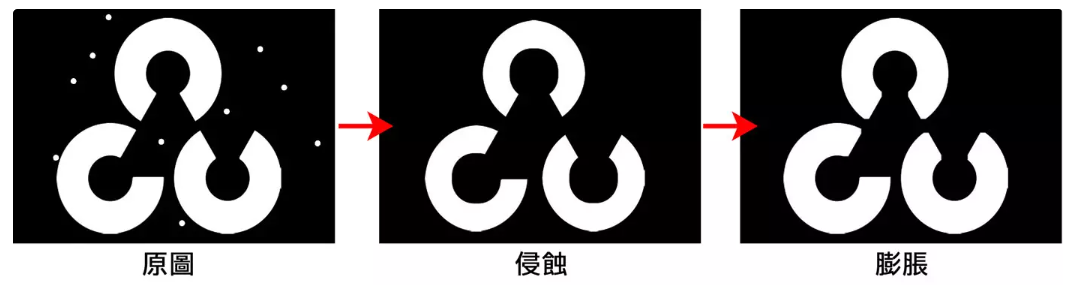

In [ ]:
import cv2
img = cv2.imread('test.jpg')
cv2.imshow('oxxostudio1', img)   # 原始影像

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))

img = cv2.erode(img, kernel)     # 先侵蝕，將白色小圓點移除
cv2.imshow('oxxostudio2', img)   # 侵蝕後的影像

img = cv2.dilate(img, kernel)    # 再膨脹，白色小點消失
cv2.imshow('oxxostudio3', img)   # 膨脹後的影像

cv2.waitKey(0)                   # 按下 q 鍵停止
cv2.destroyAllWindows()